In [488]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [489]:
def peaks_detection(y, k, h):   

    def S1(i, k, a):    
 
        left_bound = k if i-k>=0 else i
        right_bound = k if i+k<len(a) else len(a)-i-1
        if i == 0:
            return max([float(a[i]) - float(a[i+j]) for j in range(1, int(right_bound)+1)])
        elif i == len(a)-1:
            return max([float(a[i]) - float(a[i-j]) for j in range(1, int(left_bound)+1)])
        else:
            return (max([float(a[i]) - float(a[i-j]) for j in range(1, int(left_bound)+1)]) + max([float(a[i]) - float(a[i+j]) for j in range(1, int(right_bound)+1)])) * 0.5
        
    x = np.linspace(0, len(y), len(y))
        # Compute peak function value for each of len(y) points in y
    vals = [S1(i, k, y) for i in range(len(y))]
        # Compute the mean and standard deviation of all positive values in array vals
    filtered_vals = list(filter(lambda x: x > 0, vals))
    mean = np.mean(filtered_vals)
    std = np.std(filtered_vals)
        # Remove local peaks which are “small” in global context 
    peaks = [(i, x[i], y[i]) for i in range(len(y)) if vals[i] > 0 and (vals[i] - mean) > (h * std)]
        # Retain only one peak out of any set of peaks within distance k of each other
    i = 0
    while i < len(peaks):    
        for j, peakj in enumerate(peaks):
            if peaks[i][0] != peakj[0]:
                if abs(peaks[i][0] - peakj[0]) <= k:
                    if peaks[i][2] >= peakj[2]:
                        del peaks[j]
                    else:
                        del peaks[i]
                        i -= 1
                        break
        i += 1
        # return list with tuples of such form (x_coordinate, y_coordinate)
    return peaks

In [490]:
vtime, vel = [], []
with open('test.csv', 'r') as f:                      
    reader = csv.reader(f.read().splitlines())   
    for num, row in enumerate(reader):
        vtime.append(row[0])
        vel.append((row[1]))


In [491]:
vtime.pop(0)
vel.pop(0)
vel1= vel
vel2=vel

In [492]:
input_data = np.asarray(vel,np.float)

In [493]:
x = np.linspace(0, len(vtime), len(vtime))

In [494]:
peaks = peaks_detection(vel, 1, 1)

In [495]:
input_data = np.asarray(vel,np.float)
type(vel)
lis = vel

In [496]:
lis2 = []
x =np.array(lis)
for e in x:
    lis2.append(float(e))
vel =-1*np.array(lis2)

In [497]:
peaks2 = peaks_detection(vel, 5, 1)
x = np.linspace(0, len(vtime), len(vtime))

In [498]:
for i, peak in enumerate(peaks2):
    print(peak)

(0, 0.0, -25.127300000000002)
(63, 63.173553719008261, -24.609100000000002)
(83, 83.228650137741042, -22.4636)
(97, 97.267217630853992, -20.100000000000001)
(103, 103.28374655647382, -21.945399999999999)
(116, 116.31955922865012, -24.309099)
(136, 136.37465564738289, -24.118200000000002)
(277, 277.76308539944904, -27.272698999999999)
(287, 287.79063360881543, -26.754601000000001)
(293, 293.80716253443524, -28.299999)
(320, 320.88154269972449, -33.900002000000001)
(327, 327.90082644628097, -37.163601)
(341, 341.93939393939394, -38.545399000000003)
(347, 347.95592286501375, -41.299999)
(353, 353.97245179063356, -43.718201000000001)
(363, 364.0, -41.336399)


In [499]:
import operator
def find_intermediate_min(points, points1):
    for j in range(len(points)-1):
        x1 = points[j][0]
        y1 = points[j+1][0]
        (index1, value) = min(enumerate(vel1[x1:y1]), key=operator.itemgetter(1))
        m = vel1.index(value)
        value = -1*float(value)
        points1.append([m,x[m],value])
        
find_intermediate_min(peaks, peaks2)
peaks2_final = peaks2

In [487]:
def find_intermediate_max(point, point1):
    for i in range(len(point)-1):
        x2 = point[i][0]
        y2 = point[i+1][0]
        (index1, value) = max(enumerate(vel2[x2:y2]), key=operator.itemgetter(1))
        m = vel2.index(value)
        point1.append([m,x[m],value])
        
find_intermediate_max(peaks2, peaks)
peaks_final = peaks

In [396]:
for i, peak in enumerate(peaks):
    print(peak)

(2, 2.0055096418732781, '28.0909')
(20, 20.055096418732781, '25.781799')
(23, 23.0633608815427, '26.318199')
(58, 58.15977961432506, '26.572701')
(82, 82.225895316804397, '23.6364')
(105, 105.2892561983471, '25.0364')
(119, 119.32782369146004, '27.181801')
(216, 216.59504132231405, '23.6364')
(232, 232.63911845730024, '25.236401')
(235, 235.64738292011018, '25.0546')
(284, 284.78236914600546, '29.563601')
(299, 299.82369146005504, '32.709099')
(306, 306.84297520661153, '34.1091')
(317, 317.87327823691459, '34.072701')
(322, 322.88705234159778, '35.636398')
(324, 324.89256198347107, '37.118198')
(331, 331.91184573002749, '41.209099')
(333, 333.91735537190078, '41.318199')
(345, 345.95041322314046, '41.9636')
(350, 350.96418732782365, '47.209099')
(356, 356.98071625344352, '45.136398')
[2, 2.0055096418732781, '28.0909']
[66, 66.181818181818173, '26.336399']
[36, 36.099173553719005, '24.5455']
[100, 100.2754820936639, '22.327299']
[77, 77.212121212121204, '25.0364']
[119, 119.327823691460

In [397]:
for i, peak in enumerate(peaks2):
    print(peak)

(0, 0.0, -25.127300000000002)
(63, 63.173553719008261, -24.609100000000002)
(83, 83.228650137741042, -22.4636)
(97, 97.267217630853992, -20.100000000000001)
(103, 103.28374655647382, -21.945399999999999)
(116, 116.31955922865012, -24.309099)
(136, 136.37465564738289, -24.118200000000002)
(277, 277.76308539944904, -27.272698999999999)
(287, 287.79063360881543, -26.754601000000001)
(293, 293.80716253443524, -28.299999)
(320, 320.88154269972449, -33.900002000000001)
(327, 327.90082644628097, -37.163601)
(341, 341.93939393939394, -38.545399000000003)
(347, 347.95592286501375, -41.299999)
(353, 353.97245179063356, -43.718201000000001)
(363, 364.0, -41.336399)
[19, 19.052341597796143, -24.9636]
[21, 21.057851239669418, -25.0818]
[32, 32.088154269972449, -24.0546]
[81, 81.223140495867767, -23.1]
[97, 97.267217630853992, -20.1]
[111, 111.30578512396693, -23.836399]
[215, 215.5922865013774, -23.6546]
[220, 220.60606060606059, -21.9636]
[90, 90.24793388429751, -23.9091]
[236, 236.65013774104682,

In [500]:
pt = np.array(peaks2_final)[:,2]
pt = -1*pt

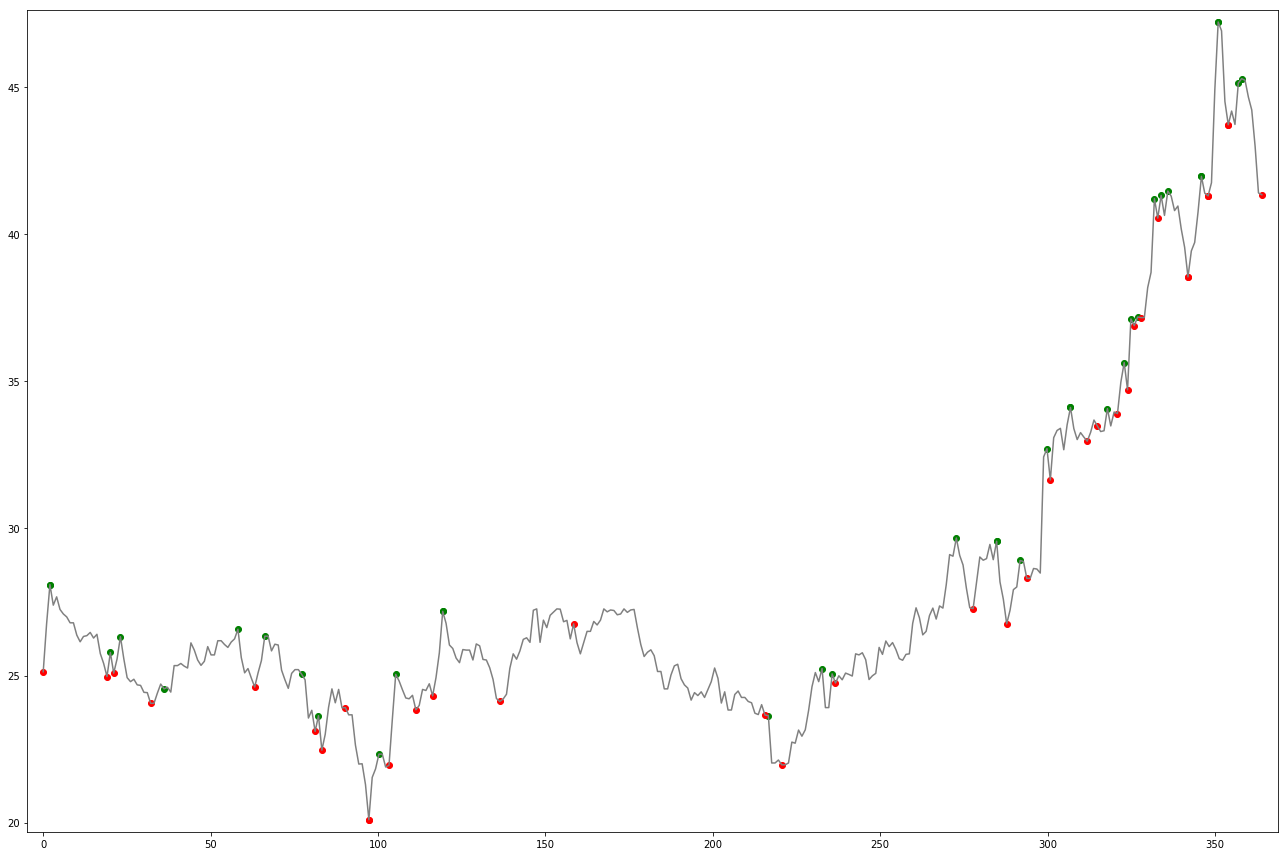

In [501]:

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
    # basic line plot
plt.plot(x, input_data, color='grey')
    # scatter plot with peaks
vel =-1*np.array(peaks2)
plt.scatter(np.array(peaks_final)[:,1], np.array(peaks_final)[:,2], color='green')
plt.scatter(np.array(peaks2_final)[:,1], pt, color='red')

plt.tight_layout()
plt.margins(0.01)
plt.show()